<a href="https://colab.research.google.com/github/Saurav-Bhattacharjee/Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [42]:
##importing libraries
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble


In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
##Reading the dataset
df=pd.read_csv('/content/drive/MyDrive/Alma Better/Modules/machine learning/project/Linear regression project/Copy of SeoulBikeData.csv',encoding='latin1') 

In [45]:
df.head().transpose()

0           1  ...           3           4
Date                       01/12/2017  01/12/2017  ...  01/12/2017  01/12/2017
Rented Bike Count                 254         204  ...         107          78
Hour                                0           1  ...           3           4
Temperature(°C)                  -5.2        -5.5  ...        -6.2          -6
Humidity(%)                        37          38  ...          40          36
Wind speed (m/s)                  2.2         0.8  ...         0.9         2.3
Visibility (10m)                 2000        2000  ...        2000        2000
Dew point temperature(°C)       -17.6       -17.6  ...       -17.6       -18.6
Solar Radiation (MJ/m2)             0           0  ...           0           0
Rainfall(mm)                        0           0  ...           0           0
Snowfall (cm)                       0           0  ...           0           0
Seasons                        Winter      Winter  ...      Winter      Winter
Holiday                    No Holiday  No Holiday  ...  No Holiday  No Holiday
Functioning Day                   Yes         Yes  ...         Yes         Yes

[14 rows x 5 columns]

In [46]:
df.describe(include="all")

Date  Rented Bike Count  ...     Holiday  Functioning Day
count         8760        8760.000000  ...        8760             8760
unique         365                NaN  ...           2                2
top     25/05/2018                NaN  ...  No Holiday              Yes
freq            24                NaN  ...        8328             8465
mean           NaN         704.602055  ...         NaN              NaN
std            NaN         644.997468  ...         NaN              NaN
min            NaN           0.000000  ...         NaN              NaN
25%            NaN         191.000000  ...         NaN              NaN
50%            NaN         504.500000  ...         NaN              NaN
75%            NaN        1065.250000  ...         NaN              NaN
max            NaN        3556.000000  ...         NaN              NaN

[11 rows x 14 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
df.shape

(8760, 14)

In [8]:
df.size

122640

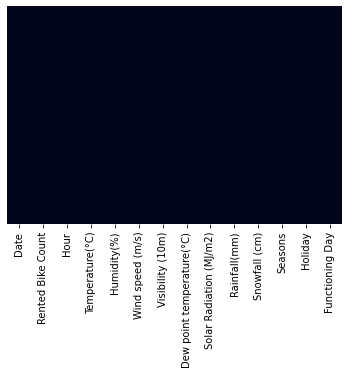

In [9]:
##Checking for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
##For getting number of unique variables in the dataset
Churn.nunique(axis=0)

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


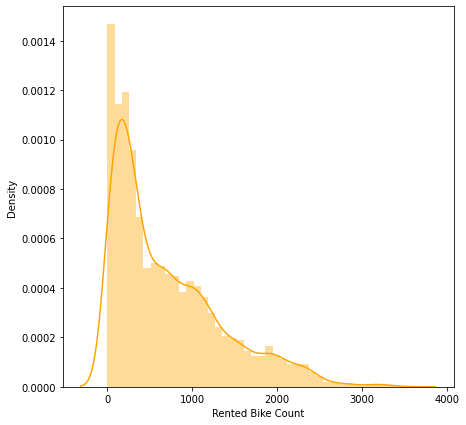

In [47]:
# Output variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="orange")

In [48]:
df['Rented Bike Count'].skew()

1.1534281773679014

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


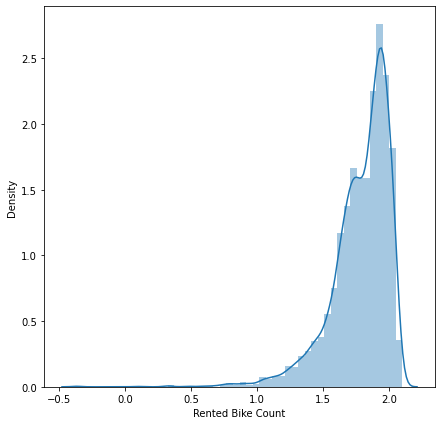

In [50]:
##Conversion of Rented Bike Count
target = np.log(df['Rented Bike Count'])
plt.figure(figsize=(7,7))
sns.distplot(target)


In [51]:
target.skew()

-1.8945587205323884

In [10]:
#Print Categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Date', 'Seasons', 'Holiday', 'Functioning Day']

In [ ]:
for feature in categorical_features:
   print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Date and number of categories are 365
The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 2


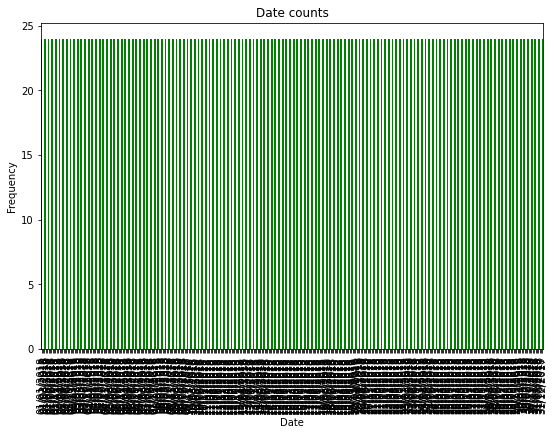

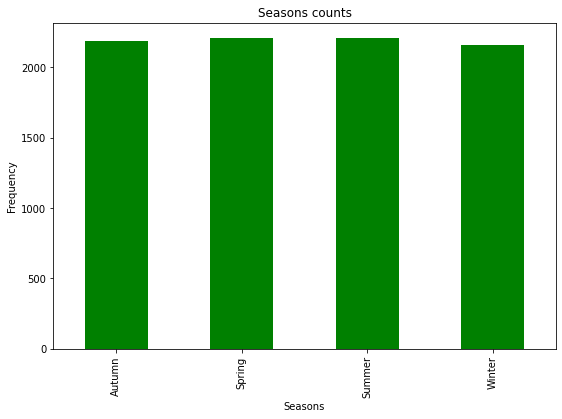

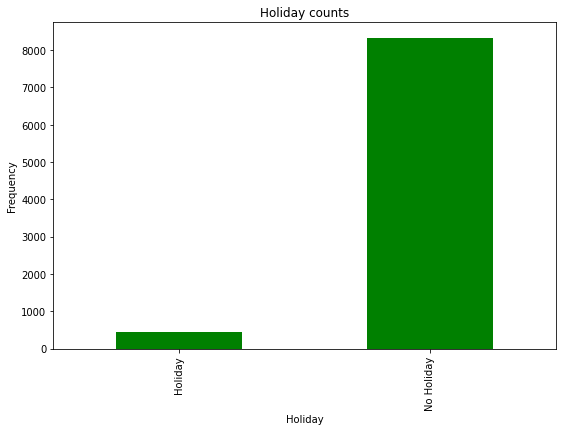

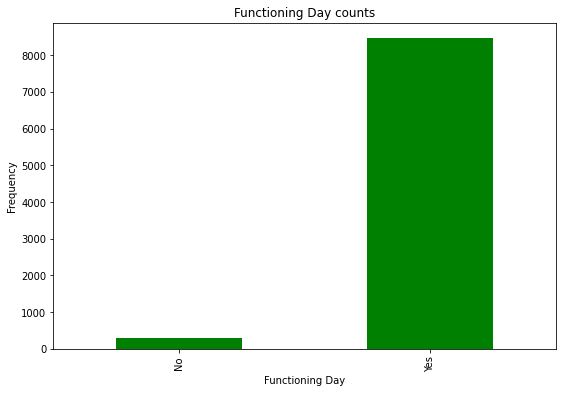

In [ ]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='green')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

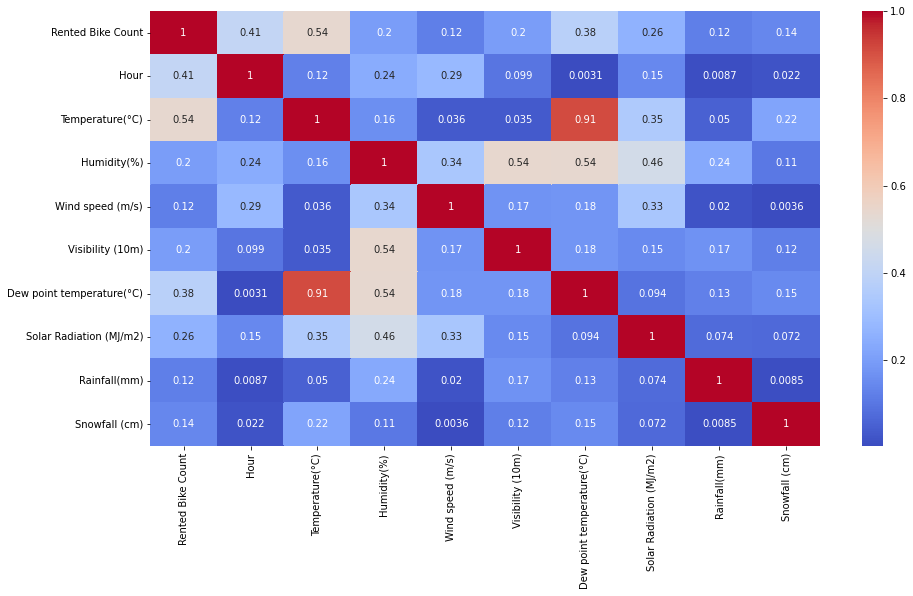

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [21]:
##For understanding the positive and negative coefficient
corr_matrix=df.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)


Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


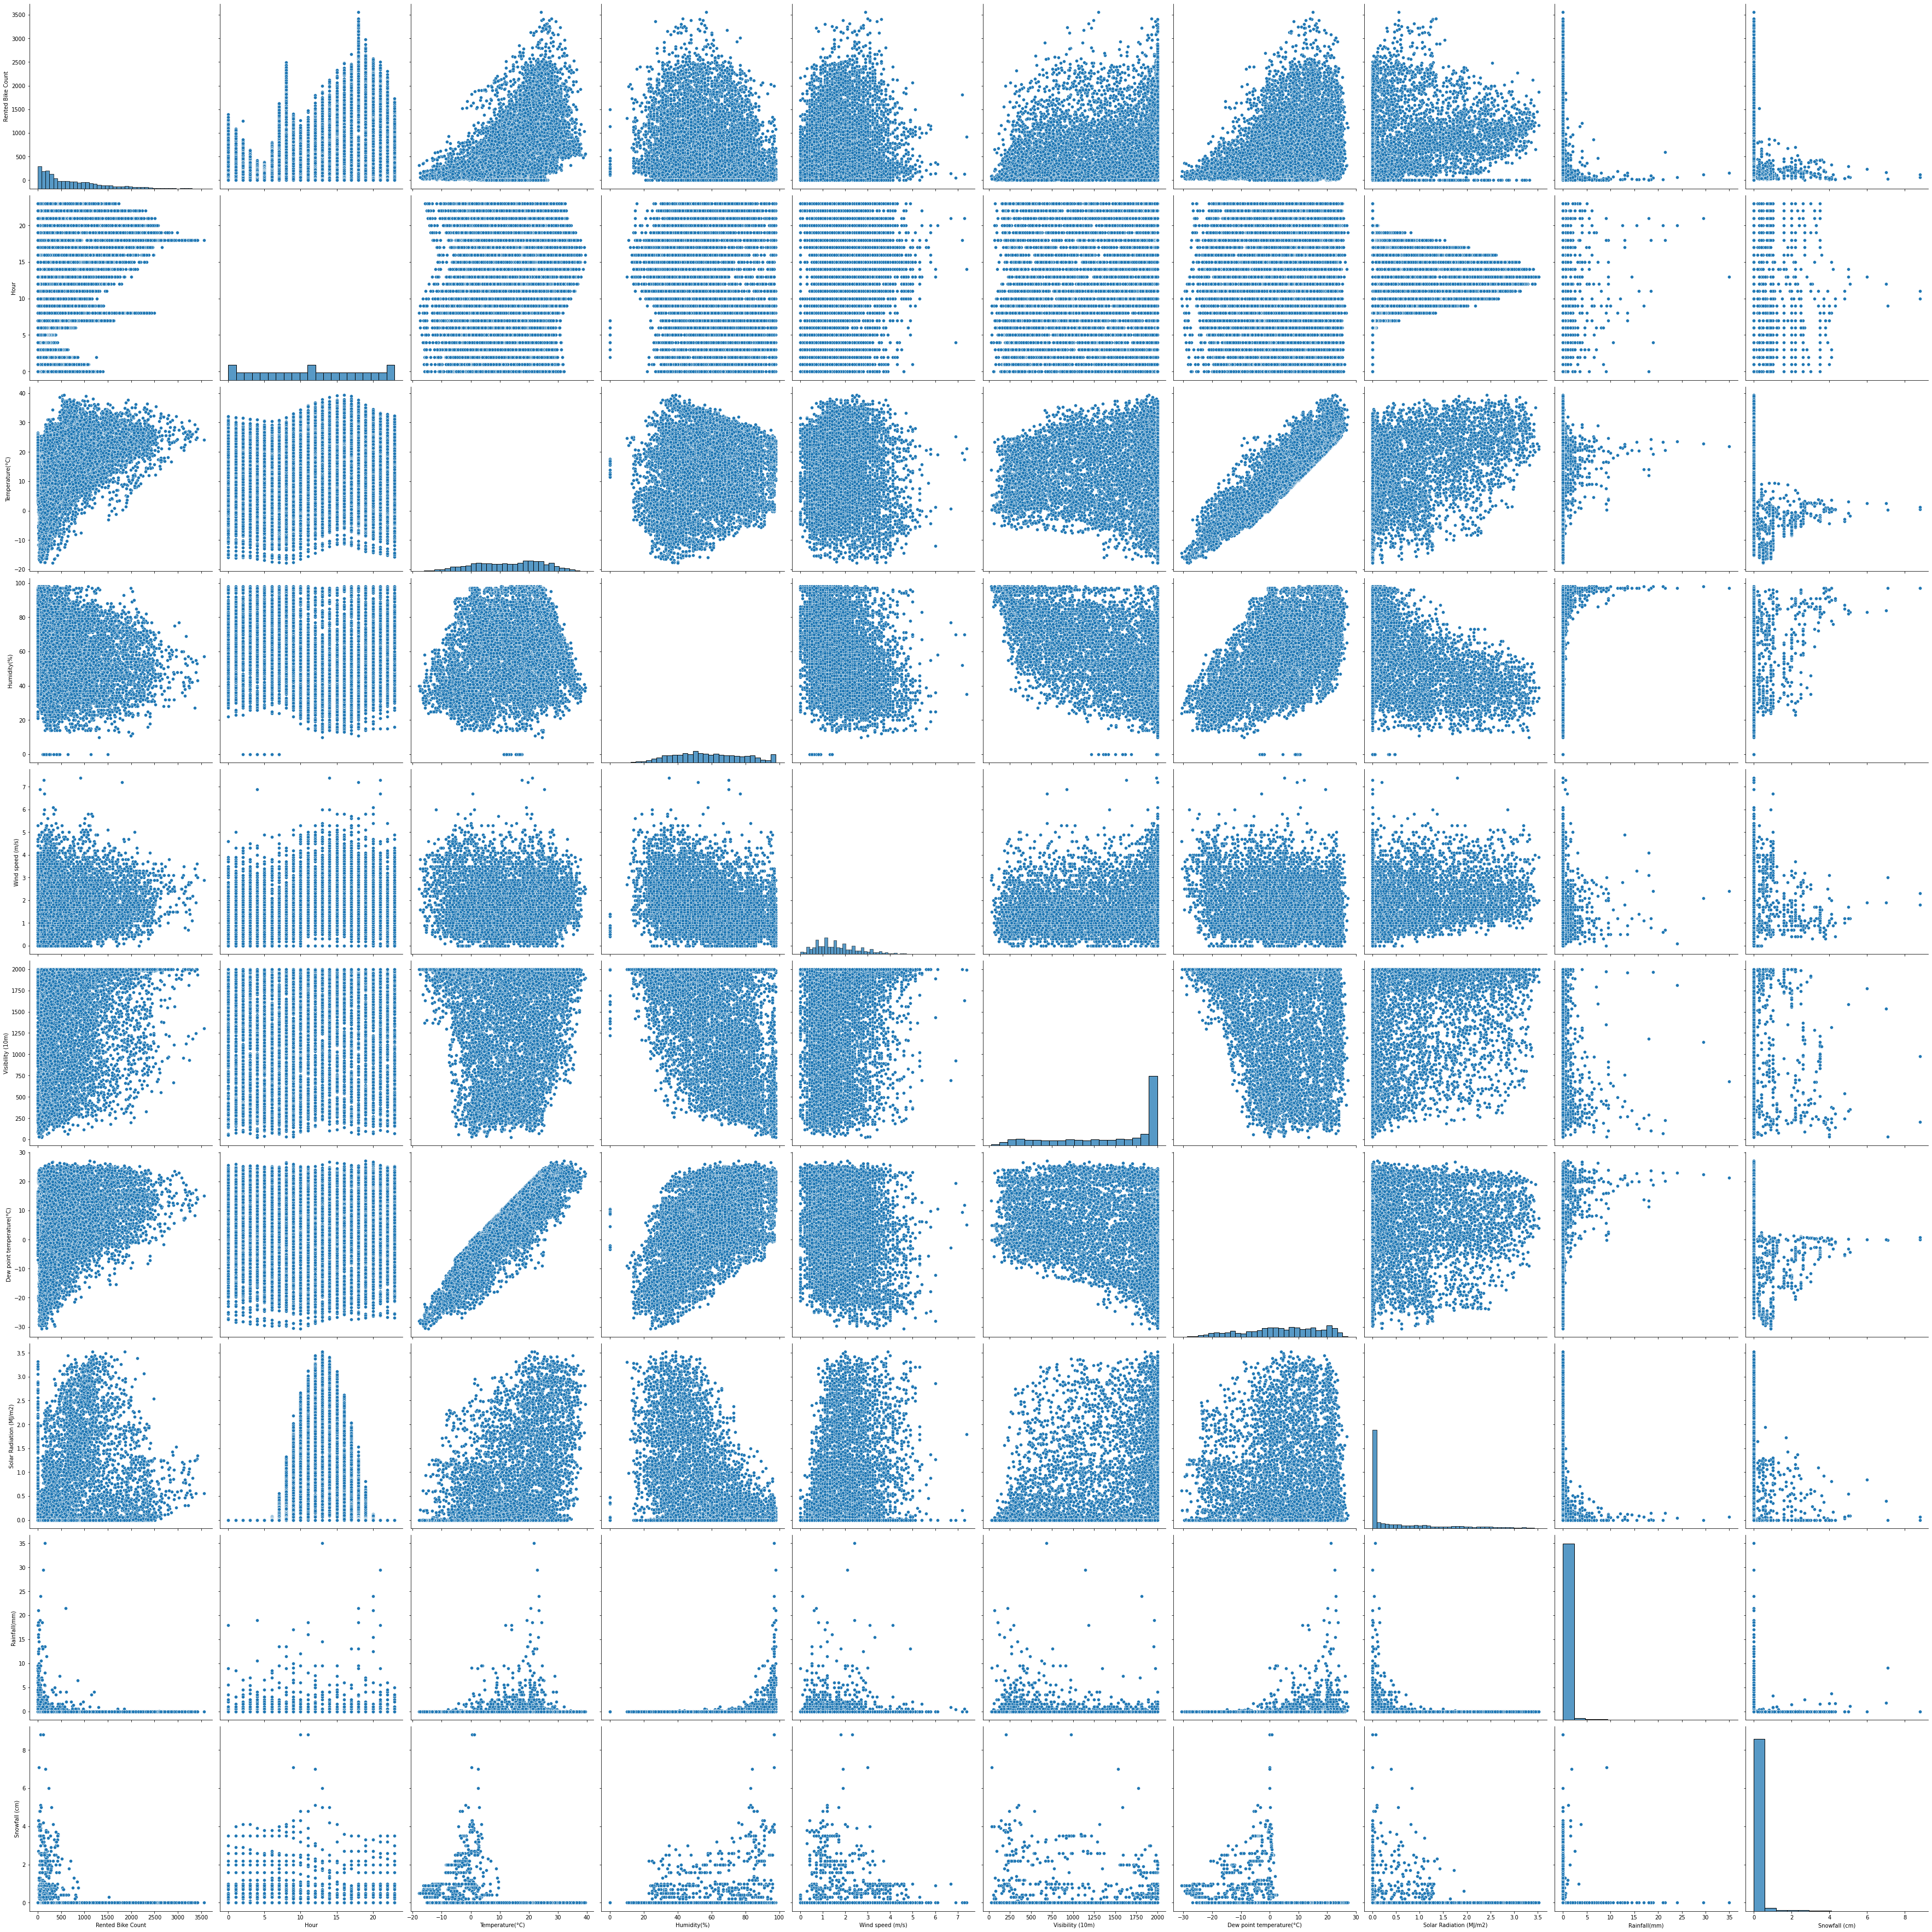

In [ ]:
sns.pairplot(df,size=5) 

Above pairplot shows that the bike count has the following relation with the varibles:-
  1.With Hour it increases upto approx 18 hours and after that it decreases
2 .With temp it increases but 25C after which it decreases
3.With Humidity it increases upto 50% but decreases after that.
4.With wind speed it increases upto 3m/s but after that it increases
5.with visibility it increases linearly with it.
6.With rainfall and snowfall it is inversly related with it.More than 0mm it directly falls.   

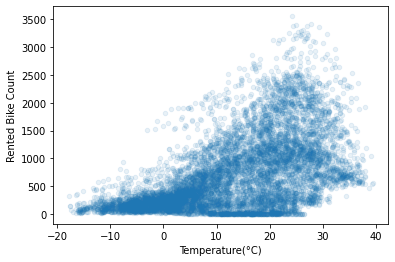

In [14]:
##Verifying the promising attributes i.e Temperature and hour
df.plot(kind="scatter",x="Temperature(°C)",y="Rented Bike Count",alpha=0.1)

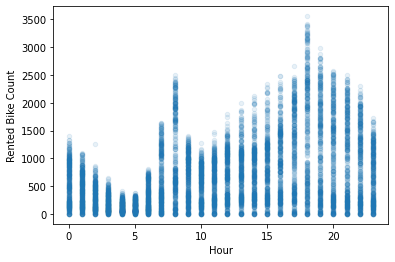

In [17]:
df.plot(kind="scatter",x="Hour",y="Rented Bike Count",alpha=0.1)

In [25]:
##Display Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [27]:
##Removing the unimportant date columns
df.drop("Date",axis=1)

Rented Bike Count  Hour  ...     Holiday  Functioning Day
0                   254     0  ...  No Holiday              Yes
1                   204     1  ...  No Holiday              Yes
2                   173     2  ...  No Holiday              Yes
3                   107     3  ...  No Holiday              Yes
4                    78     4  ...  No Holiday              Yes
...                 ...   ...  ...         ...              ...
8755               1003    19  ...  No Holiday              Yes
8756                764    20  ...  No Holiday              Yes
8757                694    21  ...  No Holiday              Yes
8758                712    22  ...  No Holiday              Yes
8759                584    23  ...  No Holiday              Yes

[8760 rows x 13 columns]

In [58]:
##Handling Text and Categorical Attributes
df_cat_1=df[['Seasons']]
df_cat_2=df[['Holiday']]
df_cat_3=df[['Functioning Day']]
cat_encoder=OneHotEncoder()
df_cat_1_encoded=cat_encoder.fit_transform(df_cat_1)
df_cat_2_encoded=cat_encoder.fit_transform(df_cat_2)
df_cat_3_encoded=cat_encoder.fit_transform(df_cat_3)
df_cat_3_encoded.toarray()


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [59]:
cat_encoder.categories_

[array(['No', 'Yes'], dtype=object)]